# **Ejercicio No 5**
* Crear una función que devuelva un mapa de calor con la correlación
de todas las variables numéricas (incluye las generadas), para cada
país.

La función debe contar con su respectiva documentación.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Curso_DataScience_peru/clases/13.2_PROYECTO2_27JULIO2023/autos_RespEjer2.csv', delimiter=",")
df1.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Log10(var1/var2),Sqrt(var1)*exp(var2)/200,5 o 3,1/logn(var1/var2)*100,var2**2/var1
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.407957,260456.051194,3,0.007213,0.018265
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.483370,264103.556242,3,0.007442,0.017330
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.461034,250445.116228,3,0.007697,0.018626
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.403692,235709.780000,3,0.007213,0.018643
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.458818,245234.097016,3,0.007982,0.018556


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Millas_Por_Galon          406 non-null    float64
 1   Cilindros                 406 non-null    int64  
 2   Pais_Origen               406 non-null    object 
 3   Peso_En_Libras            406 non-null    int64  
 4   Desplazamiento            406 non-null    float64
 5   Aceleracion               406 non-null    float64
 6   Nombre                    406 non-null    object 
 7   Anyo                      406 non-null    object 
 8   Caballo_De_Fuerza         406 non-null    float64
 9   Log10(var1/var2)          406 non-null    float64
 10  Sqrt(var1)*exp(var2)/200  406 non-null    float64
 11  5 o 3                     406 non-null    int64  
 12  1/logn(var1/var2)*100     406 non-null    float64
 13  var2**2/var1              406 non-null    float64
dtypes: float64

In [5]:
df1.round(3)
df1

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Log10(var1/var2),Sqrt(var1)*exp(var2)/200,5 o 3,1/logn(var1/var2)*100,var2**2/var1
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.407957,260456.051194,3,0.007213,0.018265
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.483370,264103.556242,3,0.007442,0.017330
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.461034,250445.116228,3,0.007697,0.018626
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.403692,235709.780000,3,0.007213,0.018643
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.458818,245234.097016,3,0.007982,0.018556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,0.953003,202236.850368,3,0.006066,0.005735
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,0.595837,150471.950114,3,0.004753,0.007512
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,1.065876,148973.963767,3,0.007394,0.006972
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,0.809668,182308.801278,3,0.005481,0.006095


In [6]:
# copiar el df y eliminar columnas con dato object
df2=df1.copy()
df2.drop(columns=['Pais_Origen','Nombre','Anyo'], inplace=True)
df2.head()

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza,Log10(var1/var2),Sqrt(var1)*exp(var2)/200,5 o 3,1/logn(var1/var2)*100,var2**2/var1
0,18.0,8,3504,307.0,12.0,130.0,1.407957,260456.051194,3,0.007213,0.018265
1,15.0,8,3693,350.0,11.5,165.0,1.483370,264103.556242,3,0.007442,0.017330
2,18.0,8,3436,318.0,11.0,150.0,1.461034,250445.116228,3,0.007697,0.018626
3,16.0,8,3433,304.0,12.0,150.0,1.403692,235709.780000,3,0.007213,0.018643
4,17.0,8,3449,302.0,10.5,140.0,1.458818,245234.097016,3,0.007982,0.018556


In [8]:
np.round(df2.corr(),2) # Matriz de Correlaciones

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza,Log10(var1/var2),Sqrt(var1)*exp(var2)/200,5 o 3,1/logn(var1/var2)*100,var2**2/var1
Millas_Por_Galon,1.00,-0.76,-0.82,-0.79,0.41,-0.76,-0.79,-0.71,-0.36,-0.57,-0.62
Cilindros,-0.76,1.00,0.90,0.95,-0.52,0.84,0.93,0.86,0.28,0.64,0.94
Peso_En_Libras,-0.82,0.90,1.00,0.93,-0.43,0.86,0.89,0.98,0.37,0.62,0.70
Desplazamiento,-0.79,0.95,0.93,1.00,-0.56,0.89,0.97,0.90,0.26,0.66,0.84
Aceleracion,0.41,-0.52,-0.43,-0.56,1.00,-0.69,-0.70,-0.40,0.14,-0.65,-0.52
Caballo_De_Fuerza,-0.76,0.84,0.86,0.89,-0.69,1.00,0.90,0.82,0.20,0.72,0.72
Log10(var1/var2),-0.79,0.93,0.89,0.97,-0.70,0.90,1.00,0.86,0.19,0.70,0.83
Sqrt(var1)*exp(var2)/200,-0.71,0.86,0.98,0.90,-0.40,0.82,0.86,1.00,0.30,0.56,0.66
5 o 3,-0.36,0.28,0.37,0.26,0.14,0.20,0.19,0.30,1.00,0.61,0.17
1/logn(var1/var2)*100,-0.57,0.64,0.62,0.66,-0.65,0.72,0.70,0.56,0.61,1.00,0.57


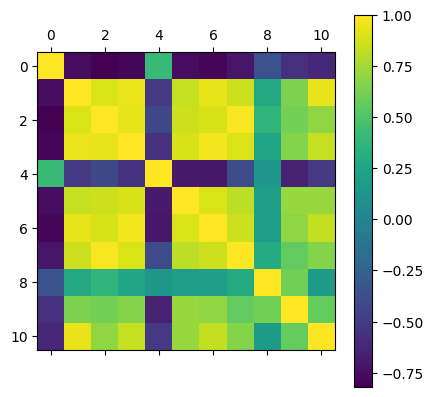

In [9]:
Mcorr= np.round(df2.corr(),2)
plt.matshow(Mcorr)
plt.colorbar()
plt.show()

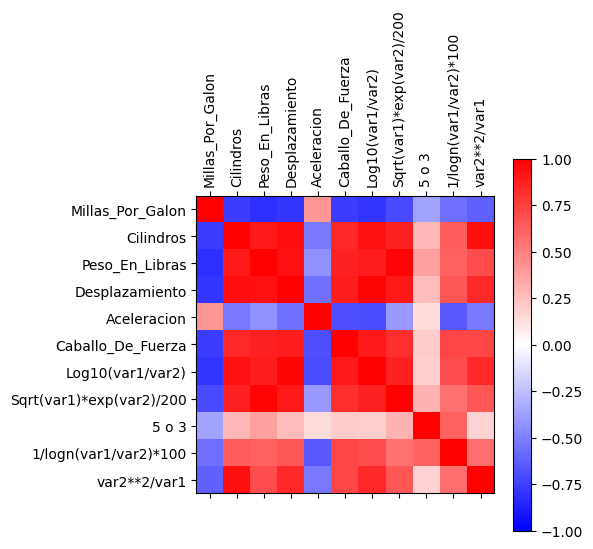

In [10]:
Mcorr= np.round(df2.corr(),2)
plt.matshow(Mcorr, cmap='bwr', vmin=-1,vmax=1)
plt.xticks(range(11), df2.columns, rotation=90)
plt.yticks(range(11), df2.columns)
plt.colorbar()
plt.show()

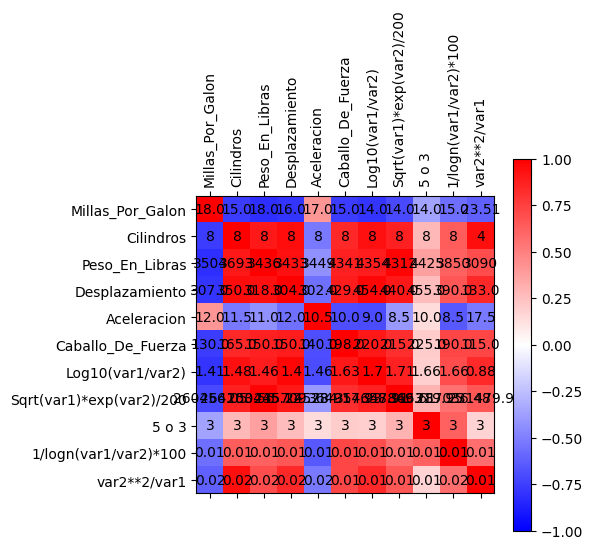

In [11]:
Mcorr= np.round(df2.corr(),2)
plt.matshow(Mcorr, cmap='bwr', vmin=-1,vmax=1)
plt.xticks(range(11), df2.columns, rotation=90)
plt.yticks(range(11), df2.columns)

for i in range(len(df2.columns)):
  for j in range(len(df2.columns)):
    plt.text(i,j, round(df2.iloc[i,j],2), ha='center',va='center')

plt.colorbar()
plt.show()